In [1]:
# For numerical computing and data manipulation
import numpy as np
import pandas as pd

In [2]:
# pwd

# Data onboarding and cleaning

### Read the data

In [3]:
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', index_col='location')
# df = pd.read_csv('..\Data\owid-covid-data.csv',index_col='location')

In [4]:
df.to_csv('all_data_backup.csv') # Save data file for reference

### Remove unwanted countries

In [5]:
countries = df.index.tolist()
countries = set(countries)
countries.remove('International')
countries.remove('World')

#countries = []
#for country in df.index:
#    if (country != 'International') & (country != 'World'):
#        if country not in countries:
#            countries.append(country)

len(countries) # number of countries for which data is available

190

In [6]:
df = df.loc[countries, :]
df = df.sort_values(by=['location','date'])

### Remove unwanted dates

In [7]:
first_date = '2020-01-24' # date there were at least 100 confirmed cases in China

date_range = df['date'] >= first_date

In [8]:
df = df.loc[date_range]

### Remove unwanted columns

In [9]:
df = df.loc[:, ['date','total_cases','new_cases','total_deaths','new_deaths']]

df

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
Afghanistan,2020-02-28,1.0,0.0,NaN,NaN
...,...,...,...,...,...
Zimbabwe,2021-01-01,14084.0,217.0,369.0,6.0
Zimbabwe,2021-01-02,14491.0,407.0,377.0,8.0
Zimbabwe,2021-01-03,15265.0,774.0,380.0,3.0


### Remove any negative case numbers

In [10]:
df_num = df._get_numeric_data()
df_num[df_num < 0] = 0
df

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
Afghanistan,2020-02-24,1.0,1.0,NaN,NaN
Afghanistan,2020-02-25,1.0,0.0,NaN,NaN
Afghanistan,2020-02-26,1.0,0.0,NaN,NaN
Afghanistan,2020-02-27,1.0,0.0,NaN,NaN
Afghanistan,2020-02-28,1.0,0.0,NaN,NaN
...,...,...,...,...,...
Zimbabwe,2021-01-01,14084.0,217.0,369.0,6.0
Zimbabwe,2021-01-02,14491.0,407.0,377.0,8.0
Zimbabwe,2021-01-03,15265.0,774.0,380.0,3.0


### Remove today data if most countries have not reported data yet

In [11]:
date_latest = max(df.date)
date_previous = df.date[-1]
date_latest

'2021-01-06'

In [12]:
df_latest = df[df['date'] == date_latest]

df_latest.index # List of countries with cases today

Index(['Argentina', 'Bahrain', 'Bulgaria', 'Chile', 'Cyprus', 'Estonia',
       'Hungary', 'Italy', 'Poland', 'Romania', 'Saudi Arabia',
       'United States'],
      dtype='object', name='location')

In [13]:
# some countries don't report case numbers until next day, so run visualization for previous day
if (len(df_latest.index) < (len(countries)/2)): # if most countries have not reported data for today
    #countries_who_did_not_report_today = list(set(countries) - set(df_latest.index)).sort() # list of countries who have not reported case numbers for today
    date_latest = date_previous
    df_previous = df[df['date'] == date_previous]
    df_latest = df_previous

In [14]:
df = df[df['date'] <= date_latest]

# Data Visualizer for Countries Most Affected today

### Sort by Highest New Cases and Highest New Deaths

In [15]:
df_new_cases = df_latest.sort_values(by='new_cases', ascending=False)
df_new_cases = df_new_cases.head(8)

df_new_cases.index # List of countries with highest new cases

Index(['United States', 'United Kingdom', 'Brazil', 'Sweden', 'Russia',
       'Spain', 'France', 'Germany'],
      dtype='object', name='location')

In [16]:
df_new_deaths = df_latest.sort_values(by='new_deaths', ascending=False)
df_new_deaths = df_new_deaths.head(8)

df_new_deaths.index # List of countries with highest new deaths

Index(['United States', 'Brazil', 'Mexico', 'Germany', 'United Kingdom',
       'France', 'Italy', 'South Africa'],
      dtype='object', name='location')

### Save data only for today's most affected countries (unique highest new cases and highest new deaths)

In [17]:
affected_countries = []
for country in df_latest.index:
    if (country in df_new_deaths.index) | (country in df_new_cases.index):
    # if (country.isin(df_new_deaths.index)) | (country.isin(df_new_cases.index)):
        affected_countries.append(country)

len(affected_countries) # number of countries that are most affected today (highest new cases or highest new deaths)

11

In [18]:
plot_data = df.loc[affected_countries, :]

plot_data

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
Brazil,2020-02-26,1.0,1.0,NaN,NaN
Brazil,2020-02-27,1.0,0.0,NaN,NaN
Brazil,2020-02-28,1.0,0.0,NaN,NaN
Brazil,2020-02-29,2.0,1.0,NaN,NaN
Brazil,2020-03-01,2.0,0.0,NaN,NaN
...,...,...,...,...,...
United States,2021-01-01,20128693.0,160606.0,347788.0,2051.0
United States,2021-01-02,20426184.0,297491.0,350186.0,2398.0
United States,2021-01-03,20636663.0,210479.0,351580.0,1394.0


In [19]:
# Save data file
plot_data.to_csv('../Tableau/tableau_data.csv')

### Generate plot data only for certain number of days

In [20]:
import datetime as dt

#Option 1
#now = dt.date.today()
#end_date = now.strftime("%Y-%m-%d")
#start_date = now - dt.timedelta(days=30)
#start_date = start_date.strftime("%Y-%m-%d")

#Option 2
end_date = date_latest
end_date = dt.datetime.strptime(end_date, "%Y-%m-%d").date()
start_date = end_date - dt.timedelta(days=30)
start_date = start_date.strftime("%Y-%m-%d")

#Option 3
#start_date = '2020-01-20' # date of first confirmed case in US

date_range = (plot_data['date'] > start_date)

In [21]:
plot_data = plot_data.loc[date_range]

plot_data

,date,total_cases,new_cases,total_deaths,new_deaths
location,,,,,
Brazil,2020-12-07,6623911.0,20371.0,177317.0,376.0
Brazil,2020-12-08,6674999.0,51088.0,178159.0,842.0
Brazil,2020-12-09,6728452.0,53453.0,178995.0,836.0
Brazil,2020-12-10,6781799.0,53347.0,179765.0,770.0
Brazil,2020-12-11,6836227.0,54428.0,180437.0,672.0
...,...,...,...,...,...
United States,2021-01-01,20128693.0,160606.0,347788.0,2051.0
United States,2021-01-02,20426184.0,297491.0,350186.0,2398.0
United States,2021-01-03,20636663.0,210479.0,351580.0,1394.0


### Formatting data

In [22]:
plot_date=[]
for dates in plot_data['date']:
    if dates not in plot_date:
        plot_date.append(dates)

# plot_date

In [23]:
plot_data.index.value_counts() # number of data points to be plotted

Sweden            30
Italy             30
Germany           30
Russia            30
United States     30
Mexico            30
France            30
Brazil            30
United Kingdom    30
South Africa      30
Spain             30
Name: location, dtype: int64

In [24]:
dic_new_cases={}
for i in range(len(affected_countries)):
    dic_new_cases[i] = plot_data.loc[affected_countries[i], ['date','new_cases']]

# dic_new_cases

In [25]:
dic_new_deaths={}
for i in range(len(affected_countries)):
    dic_new_deaths[i] = plot_data.loc[affected_countries[i], ['date','new_deaths']]
    
# dic_new_deaths

In [26]:
from datetime import datetime

date_string = str(max(plot_date))
date_object = datetime.strptime(date_string, '%Y-%m-%d')
date_format = date_object.strftime("%b %d %Y")

chart_title = 'Most Affected Countries as of ' + date_format

### Plot (finally!)

In [27]:
import matplotlib.pyplot as plt

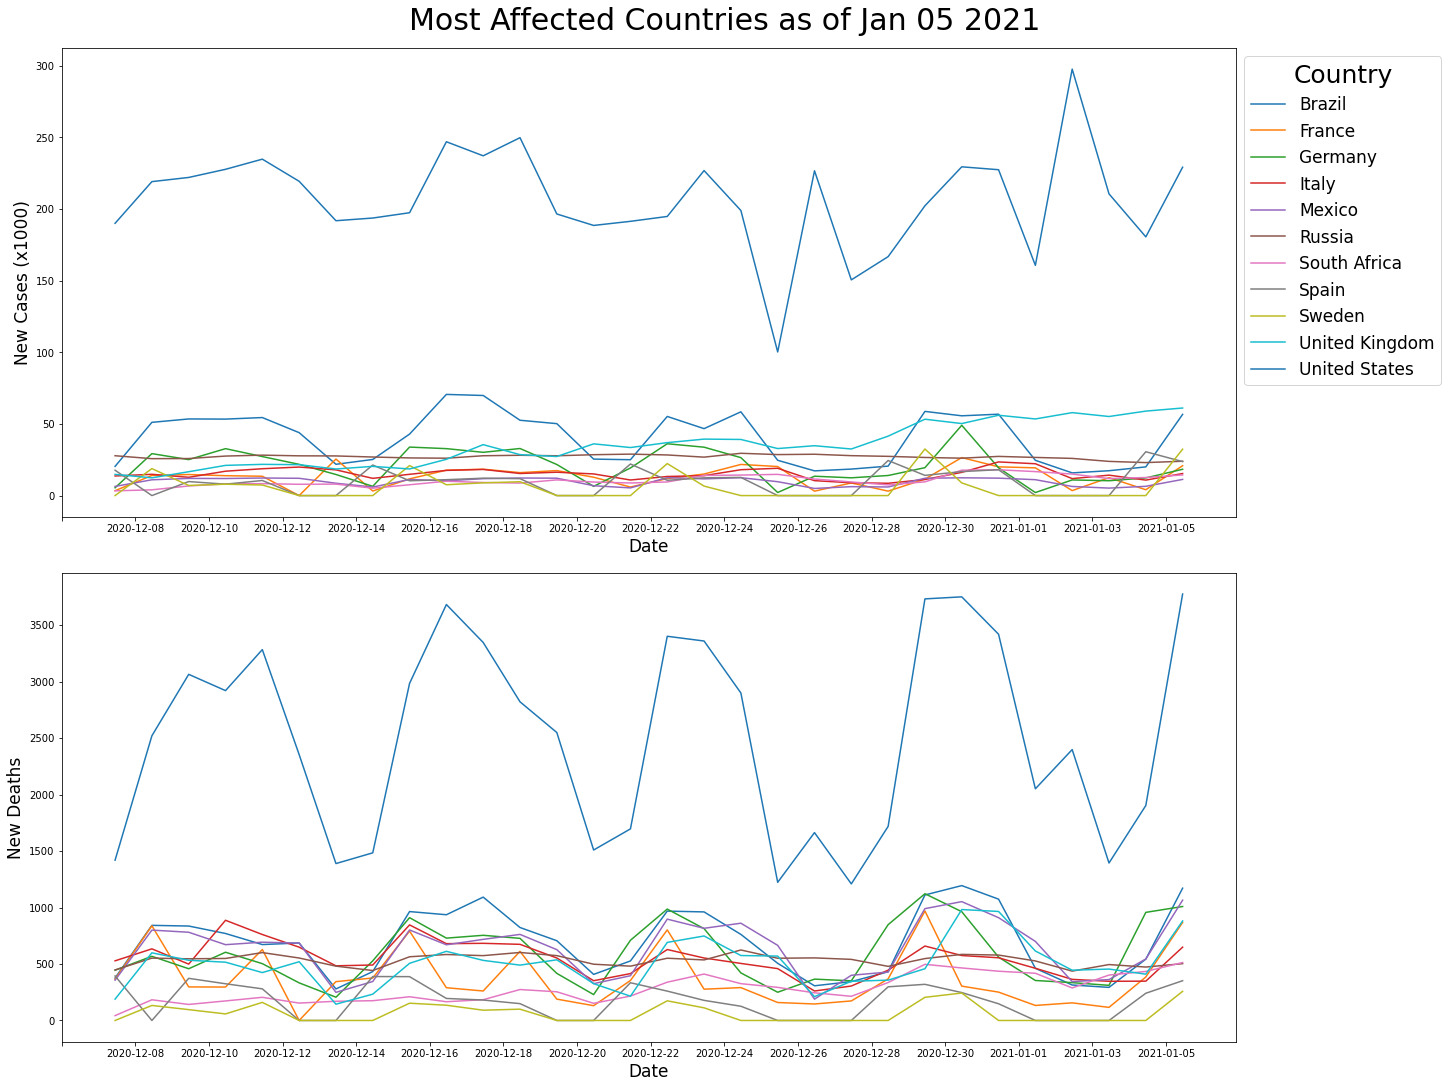

In [28]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(20,15), constrained_layout=True)
f.suptitle(chart_title, fontsize=30)

for x in range(len(affected_countries)):
    ax1.plot(plot_date, dic_new_cases[x]['new_cases']/1000, label=affected_countries[x])
# ax1.plot(plot_date, df_india_new_cases/1000, label='India')
# ax1.plot(plot_date, df_us_new_cases/1000, label='US')
ax1.set_xlabel('Date', fontsize=17)
ax1.set_ylabel('New Cases (x1000)', fontsize=17)
# ax1.set_title('New Cases over time', fontsize=20)
ax1.legend(bbox_to_anchor=(1, 1), fontsize=17, title="Country", title_fontsize=25)

for x in range(len(affected_countries)):
    ax2.plot(plot_date, dic_new_deaths[x]['new_deaths'], label=affected_countries[x])
# ax2.plot(plot_date, df_india_new_deaths, label='India')
# ax2.plot(plot_date, df_us_new_deaths, label='US')
ax2.set_xlabel('Date', fontsize=17)
ax2.set_ylabel('New Deaths', fontsize=17)
# ax2.set_title('New Deaths over time', fontsize=20)

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(start, end, 2))
ax2.xaxis.set_ticks(np.arange(start, end, 2))

# plt.subplots_adjust(hspace=0.4)
plt.show()

In [29]:
f.savefig('covid_plot.png', dpi=300)

# Data Visualizer for G20 Countries

In [30]:
G20 = ['Argentina', 'Australia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'India', 'Indonesia', 'Italy', 'Japan', 'Mexico', 'Russia', 'Saudi Arabia', 'South Africa', 'South Korea', 'Turkey', 'United Kingdom', 'United States', 'Spain']
# G8plus5 = ['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom', 'United States', 'Russia', 'Brazil', 'China', 'India', 'Mexico', 'South Africa']

In [31]:
df_g20 = df.loc[G20, ['date','total_cases','total_deaths']]

len(set(df_g20.index)) # number of G20 countries found in data

# df_g20

20

In [32]:
# df_us = plot_data.loc['United States', :]

# df_us_new_cases = df_us['new_cases']
# df_us_new_deaths = df_us['new_deaths']

In [33]:
# Save data file
df_g20.to_csv('../Tableau/g20_data.csv')

# Data Visualizer for US States

In [34]:
df_us = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv', index_col='state')

In [35]:
calc_date = df_us.date.unique()[-2]
calc_date_range = (df_us['date'] >= calc_date)

df_us = df_us.loc[calc_date_range]

In [36]:
df_us = df_us.sort_values(by=['state','date'])

df_us['new_cases'] = 0
df_us = df_us[df_us.columns[~df_us.columns.isin(['fips'])]]

In [37]:
for d in range(1,len(df_us.index),1):
    if (d % 2) != 0:
        df_us.iat[d,3] = max(0, df_us.iat[d,1] - df_us.iat[d-1,1])
# df_us

In [38]:
us_max_date = (df_us['date'] == max(df_us.date))

df_us = df_us.loc[us_max_date]

# df_us

In [39]:
# Save data file
df_us.to_csv('../Tableau/US/us-states.csv')

In [40]:
print('See visualization at: \n https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStateswithHighestTotalCases \nAND \n https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStatesandTerritories')

See visualization at: 
 https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStateswithHighestTotalCases 
AND 
 https://public.tableau.com/profile/nihar.garg#!/vizhome/COVID19_visualizer_US/USStatesandTerritories
